## 1. Import the libraries

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#from torch_cluster import random_walk
from sklearn.linear_model import LogisticRegression
import torch_geometric.transforms as T
from torch_geometric.nn import SAGEConv
from torch_geometric.datasets import Planetoid
from torch_geometric.data import NeighborSampler as RawNeighborSampler
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from torch_geometric.datasets import KarateClub

c:\Users\locda\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Import the cora dataset

In [6]:
dataset = 'Cora'
path = './data'
dataset = Planetoid(path, dataset, transform=T.NormalizeFeatures())
data = dataset[0]

In [19]:
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [7]:
from typing import Optional, Tuple, Union

In [8]:
from torch import Tensor
from sklearn.manifold import TSNE



## 3. Build MLP model
This model is a testing model to practice, so we did not include in our project and report

In [9]:
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


In [10]:
data = dataset[0]

In [ ]:

model = MLP(hidden_channels=16)

model.eval()
h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

### A summary of the Cora dataset

In [13]:
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


### Define a function to visulize the embedding nodes

In [14]:
def visualize(h, color, epoch=None, loss=None):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])
    plt.scatter(z[:,0], z[:,1], s = 70, c = color, cmap = "Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

In [ ]:
import timeit

### Train the MLP model using Linear convolution, since this one does not use GNN method, we did not include in our report

In [18]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc
start = timeit.timeit()
for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')




end = timeit.timeit()
print(end - start)

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9615
Epoch: 002, Loss: 1.9557
Epoch: 003, Loss: 1.9505
Epoch: 004, Loss: 1.9423
Epoch: 005, Loss: 1.9327
Epoch: 006, Loss: 1.9279
Epoch: 007, Loss: 1.9144
Epoch: 008, Loss: 1.9087
Epoch: 009, Loss: 1.9023
Epoch: 010, Loss: 1.8893
Epoch: 011, Loss: 1.8776
Epoch: 012, Loss: 1.8594
Epoch: 013, Loss: 1.8457
Epoch: 014, Loss: 1.8365
Epoch: 015, Loss: 1.8280
Epoch: 016, Loss: 1.7965
Epoch: 017, Loss: 1.7984
Epoch: 018, Loss: 1.7832
Epoch: 019, Loss: 1.7495
Epoch: 020, Loss: 1.7441
Epoch: 021, Loss: 1.7188
Epoch: 022, Loss: 1.7124
Epoch: 023, Loss: 1.6785
Epoch: 024, Loss: 1.6660
Epoch: 025, Loss: 1.6119
Epoch: 026, Loss: 1.6236
Epoch: 027, Loss: 1.5827
Epoch: 028, Loss: 1.5784
Epoch: 029, Loss: 1.5524
Epoch: 030, Loss: 1.5020
Epoch: 031, Loss: 1.5065
Epoch: 032, Loss: 1.4742
Epoch: 033, Loss: 1.4581
Epoch: 034, Loss: 1.4246
Epoch: 035, Loss: 1.4131
Epoch: 036, Loss: 1.4112
Epoch: 037, Loss: 1.3923
Epoch: 038, Loss: 1.3055
Epoch: 039, Loss: 1.2982
Epoch: 040, Loss: 1.2543


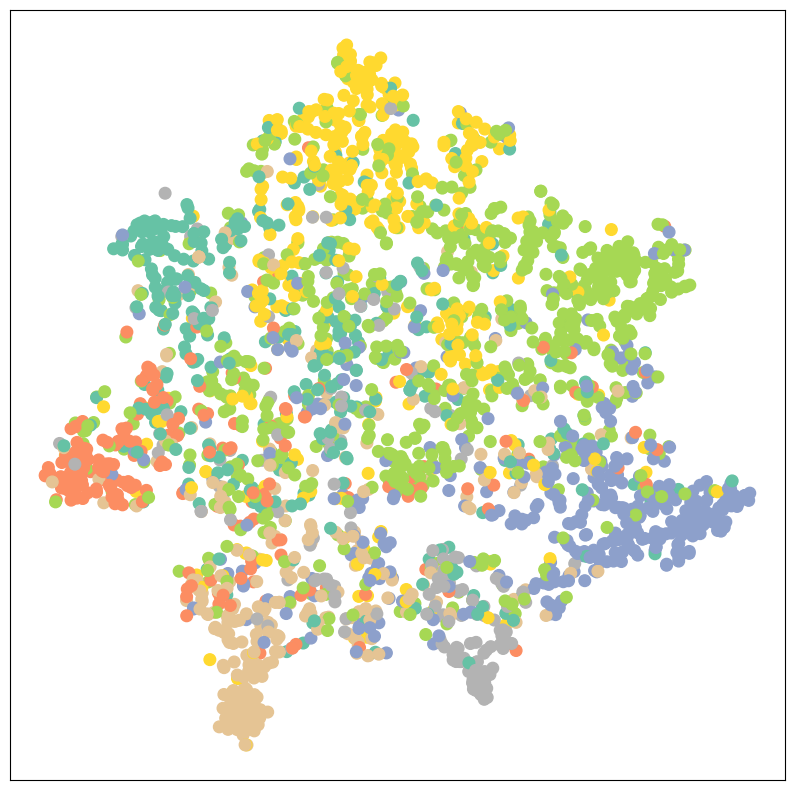

In [16]:
model.eval()

out = model(data.x)
visualize(out, color=data.y)

In [31]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5900


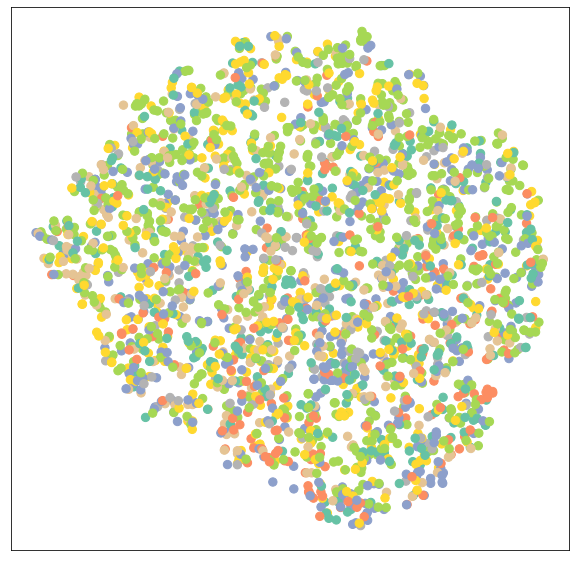

In [83]:
model = MLP(hidden_channels=16)
model.eval()
out = model(data.x, data.edge_index)
visualize(out, color=data.y)

## 3. Building the GCN model using GCNConv, this only requries 2 paremeters, the rest are optional

### By using the double question mark ??, we can see the summary of any function and its paremeters

In [64]:
GCNConv??

Init signature:
GCNConv(
    in_channels: int,
    out_channels: int,
    improved: bool = False,
    cached: bool = False,
    add_self_loops: bool = True,
    normalize: bool = True,
    bias: bool = True,
    **kwargs,
)
Source:        
class GCNConv(MessagePassing):
    r"""The graph convolutional operator from the `"Semi-supervised
    Classification with Graph Convolutional Networks"
    <https://arxiv.org/abs/1609.02907>`_ paper

    .. math::
        \mathbf{X}^{\prime} = \mathbf{\hat{D}}^{-1/2} \mathbf{\hat{A}}
        \mathbf{\hat{D}}^{-1/2} \mathbf{X} \mathbf{\Theta},

    where :math:`\mathbf{\hat{A}} = \mathbf{A} + \mathbf{I}` denotes the
    adjacency matrix with inserted self-loops and
    :math:`\hat{D}_{ii} = \sum_{j=0} \hat{A}_{ij}` its diagonal degree matrix.
    The adjacency matrix can include other values than :obj:`1` representing
    edge weights via the optional :obj:`edge_weight` tensor.

    Its node-wise formulation is given by:

    .. math::
        \mathb

In [21]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)
        

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


### Visualize the Cora dataset before training

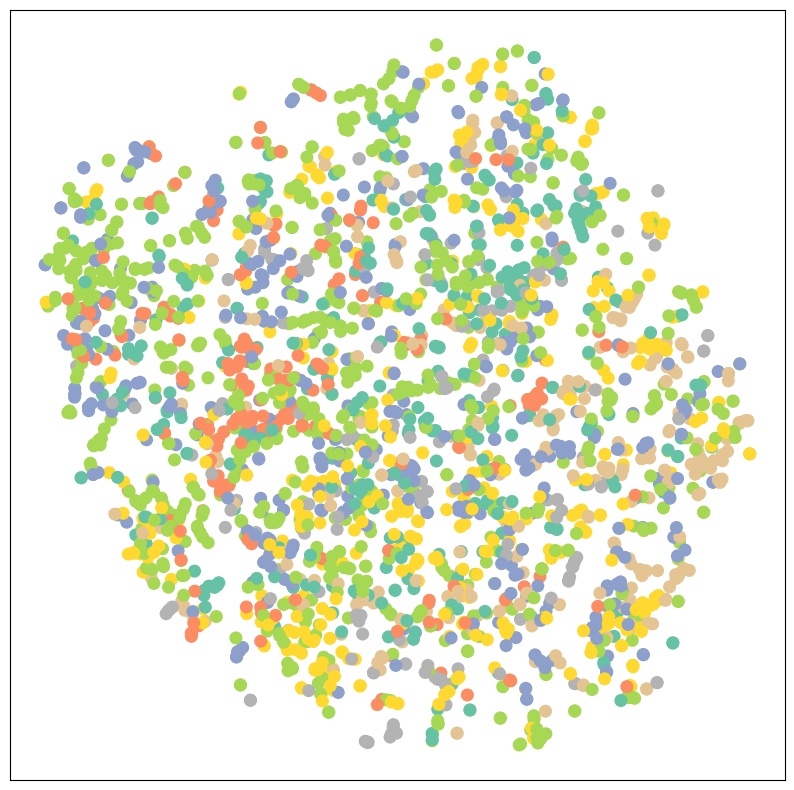

In [22]:
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

### Define train() and test() functions for each type of convolution layer

In [66]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad() 
      out = model(data.x, data.edge_index)  
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  
      loss.backward()  
      optimizer.step() 
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  
      test_correct = pred[data.test_mask] == data.y[data.test_mask] 
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum()) 
      return test_acc

start = timeit.timeit()  ## set timer
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

end = timeit.timeit()
print(end - start)

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9463
Epoch: 002, Loss: 1.9409
Epoch: 003, Loss: 1.9343
Epoch: 004, Loss: 1.9275
Epoch: 005, Loss: 1.9181
Epoch: 006, Loss: 1.9086
Epoch: 007, Loss: 1.9015
Epoch: 008, Loss: 1.8933
Epoch: 009, Loss: 1.8808
Epoch: 010, Loss: 1.8685
Epoch: 011, Loss: 1.8598
Epoch: 012, Loss: 1.8482
Epoch: 013, Loss: 1.8290
Epoch: 014, Loss: 1.8233
Epoch: 015, Loss: 1.8057
Epoch: 016, Loss: 1.7966
Epoch: 017, Loss: 1.7825
Epoch: 018, Loss: 1.7617
Epoch: 019, Loss: 1.7491
Epoch: 020, Loss: 1.7310
Epoch: 021, Loss: 1.7147
Epoch: 022, Loss: 1.7056
Epoch: 023, Loss: 1.6954
Epoch: 024, Loss: 1.6697
Epoch: 025, Loss: 1.6538
Epoch: 026, Loss: 1.6312
Epoch: 027, Loss: 1.6161
Epoch: 028, Loss: 1.5899
Epoch: 029, Loss: 1.5711
Epoch: 030, Loss: 1.5576
Epoch: 031, Loss: 1.5393
Epoch: 032, Loss: 1.5137
Epoch: 033, Loss: 1.4948
Epoch: 034, Loss: 1.4913
Epoch: 035, Loss: 1.4698
Epoch: 036, Loss: 1.3998
Epoch: 037, Loss: 1.4041
Epoch: 038, Loss: 1.3761
Epoch: 039, Loss: 1.3631
Epoch: 040, Loss: 1.3258


In [67]:
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [68]:
def train(data):
      #model.train()
      optimizer.zero_grad()  
      out= model(data.x, data.edge_index)  
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  
      loss.backward()  
      optimizer.step() 
      return loss

### This is the accuracy of GCNConv

In [70]:
test_acc = test()
print(f'Test Accuracy of GCNConv: {test_acc:.4f}')

Test Accuracy of GCNConv: 0.8150


### Here is the graph after being classified

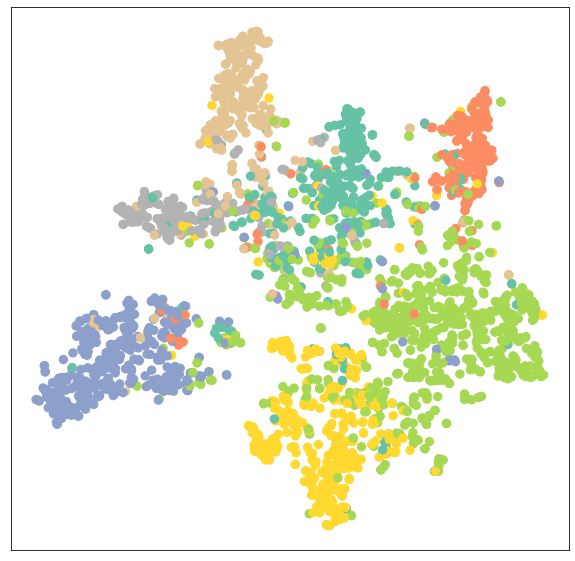

In [36]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

## 4. SAGEConv model

In [75]:
SAGEConv??

Init signature:
SAGEConv(
    in_channels: Union[int, Tuple[int, int]],
    out_channels: int,
    aggr: Union[str, List[str], torch_geometric.nn.aggr.base.Aggregation, NoneType] = 'mean',
    normalize: bool = False,
    root_weight: bool = True,
    project: bool = False,
    bias: bool = True,
    **kwargs,
)
Source:        
class SAGEConv(MessagePassing):
    r"""The GraphSAGE operator from the `"Inductive Representation Learning on
    Large Graphs" <https://arxiv.org/abs/1706.02216>`_ paper

    .. math::
        \mathbf{x}^{\prime}_i = \mathbf{W}_1 \mathbf{x}_i + \mathbf{W}_2 \cdot
        \mathrm{mean}_{j \in \mathcal{N(i)}} \mathbf{x}_j

    If :obj:`project = True`, then :math:`\mathbf{x}_j` will first get
    projected via

    .. math::
        \mathbf{x}_j \leftarrow \sigma ( \mathbf{W}_3 \mathbf{x}_j +
        \mathbf{b})

    as described in Eq. (3) of the paper.

    Args:
        in_channels (int or tuple): Size of each input sample, or :obj:`-1` to
            derive 

This layer also requires only 2 parameters: in channels and out channels

In [73]:
from torch_geometric.nn import SAGEConv


class SAGE(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = SAGEConv(dataset.num_features, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, dataset.num_classes)
        self.classifier = Linear(7, 2708)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        out = self.classifier(x)
        
        return out, x

model = SAGE(hidden_channels=16)
print(model)

SAGE(
  (conv1): SAGEConv(1433, 16, aggr=mean)
  (conv2): SAGEConv(16, 7, aggr=mean)
  (classifier): Linear(in_features=7, out_features=2708, bias=True)
)


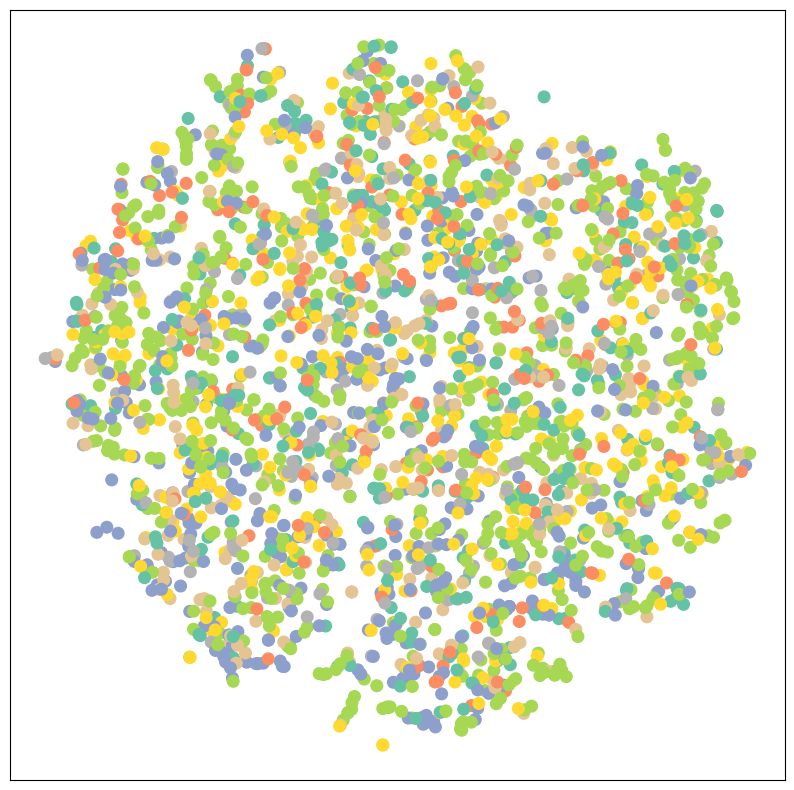

In [27]:
model = SAGE(hidden_channels=16)
model.eval()

out, h = model(data.x, data.edge_index)
visualize(out, color=data.y)

### Train and test model

In [77]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = SAGE(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train(data):
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss, h

def test():
      model.eval()
      out, h = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

start = timeit.timeit()
for epoch in range(1, 101):
    loss, h = train(data)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

end = timeit.timeit()
print(end - start)

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 7.8728
Epoch: 002, Loss: 7.8295
Epoch: 003, Loss: 7.7836
Epoch: 004, Loss: 7.7322
Epoch: 005, Loss: 7.6760
Epoch: 006, Loss: 7.6178
Epoch: 007, Loss: 7.5413
Epoch: 008, Loss: 7.4680
Epoch: 009, Loss: 7.3643
Epoch: 010, Loss: 7.2579
Epoch: 011, Loss: 7.1284
Epoch: 012, Loss: 6.9575
Epoch: 013, Loss: 6.7653
Epoch: 014, Loss: 6.5259
Epoch: 015, Loss: 6.2544
Epoch: 016, Loss: 5.9091
Epoch: 017, Loss: 5.5426
Epoch: 018, Loss: 5.0807
Epoch: 019, Loss: 4.6185
Epoch: 020, Loss: 3.9915
Epoch: 021, Loss: 3.3639
Epoch: 022, Loss: 2.9327
Epoch: 023, Loss: 2.5458
Epoch: 024, Loss: 2.4036
Epoch: 025, Loss: 2.2732
Epoch: 026, Loss: 2.1631
Epoch: 027, Loss: 2.0743
Epoch: 028, Loss: 1.9945
Epoch: 029, Loss: 1.9537
Epoch: 030, Loss: 1.9222
Epoch: 031, Loss: 1.9320
Epoch: 032, Loss: 1.9399
Epoch: 033, Loss: 1.8885
Epoch: 034, Loss: 1.9523
Epoch: 035, Loss: 1.9220
Epoch: 036, Loss: 1.9020
Epoch: 037, Loss: 1.9229
Epoch: 038, Loss: 1.9316
Epoch: 039, Loss: 1.9111
Epoch: 040, Loss: 1.8785


In [78]:
test_acc = test()
print(f'Test Accuracy of SAGEConv: {test_acc:.4f}')

Test Accuracy of SAGEConv: 0.7020


### Visualize after training

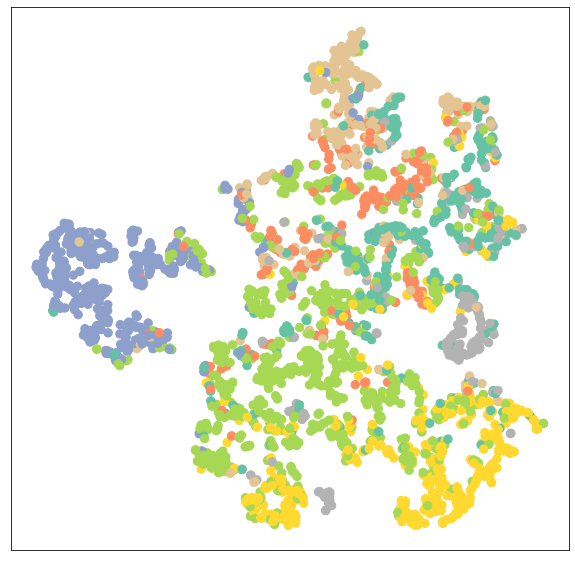

In [117]:
model.eval()

out, h = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [80]:
import time

### This loop give us the visualization of the graph after each learning cycle

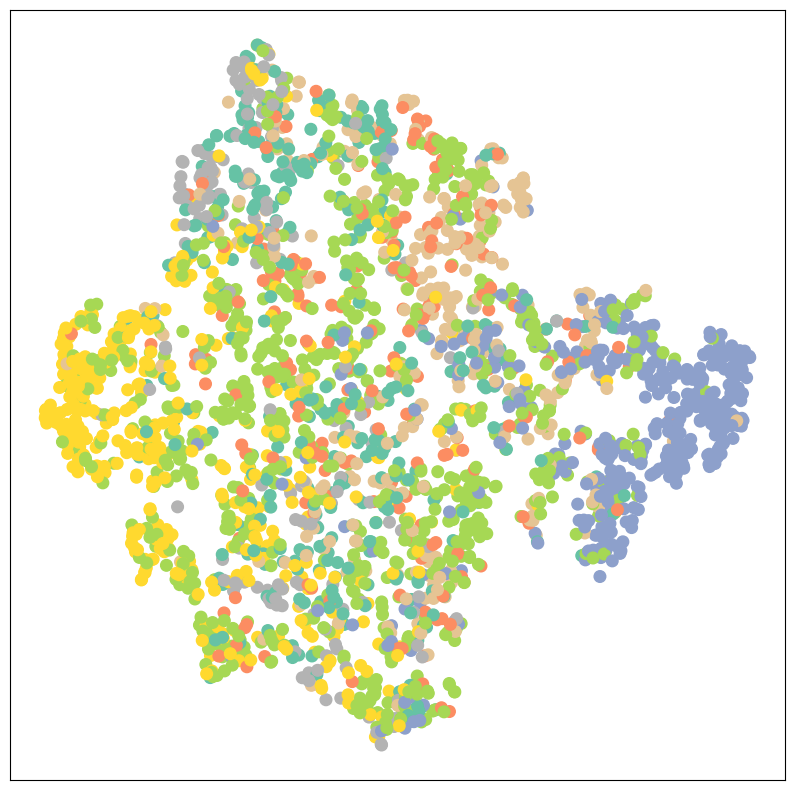

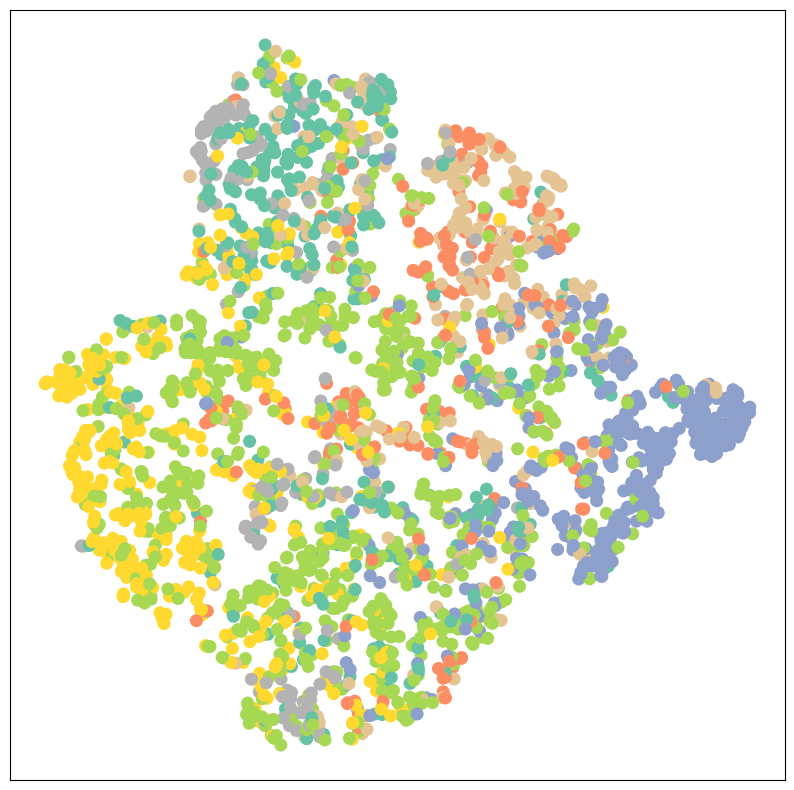

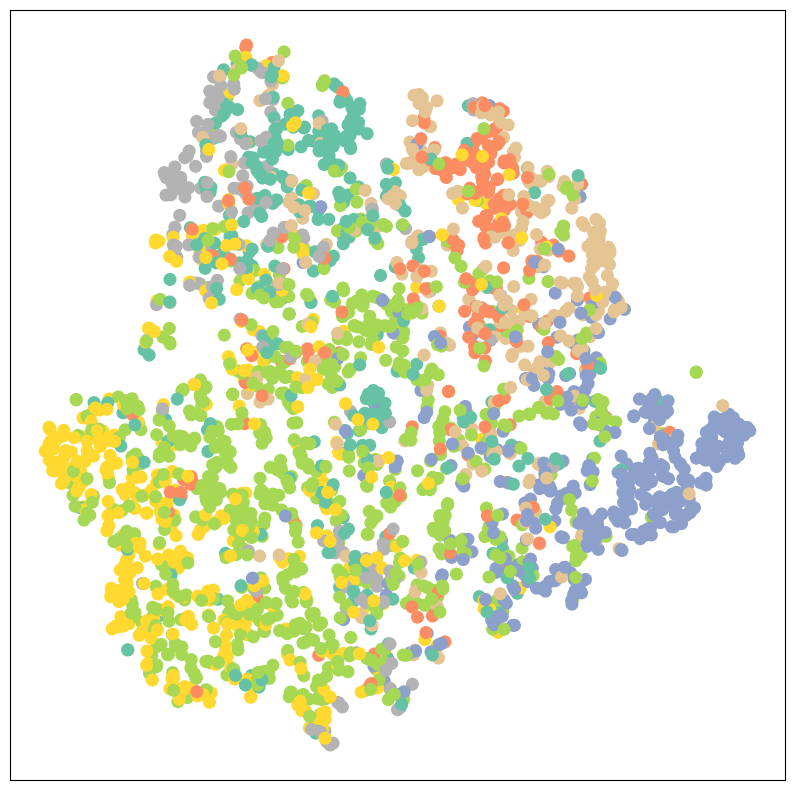

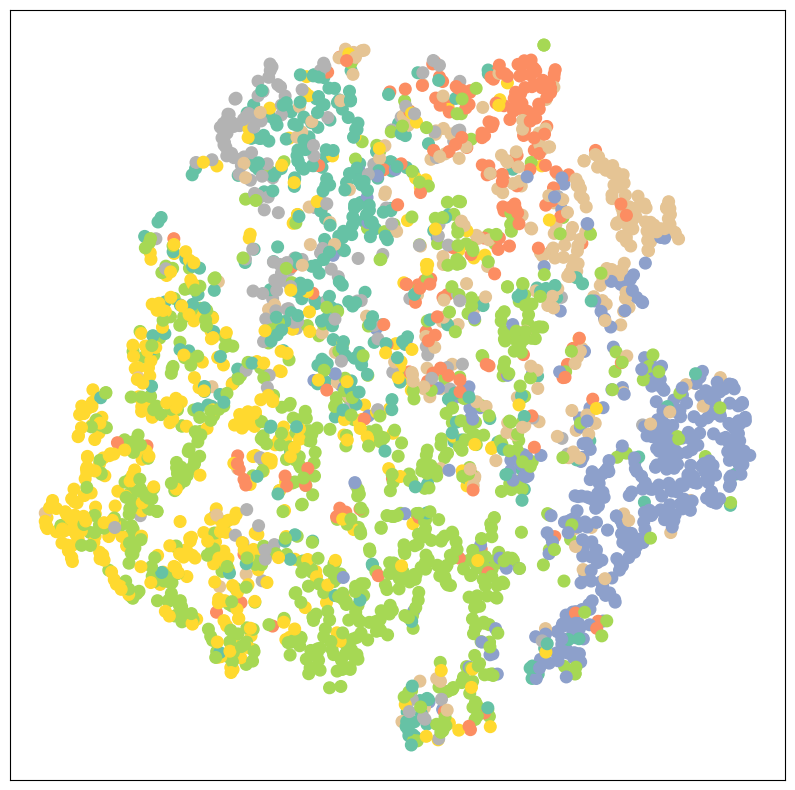

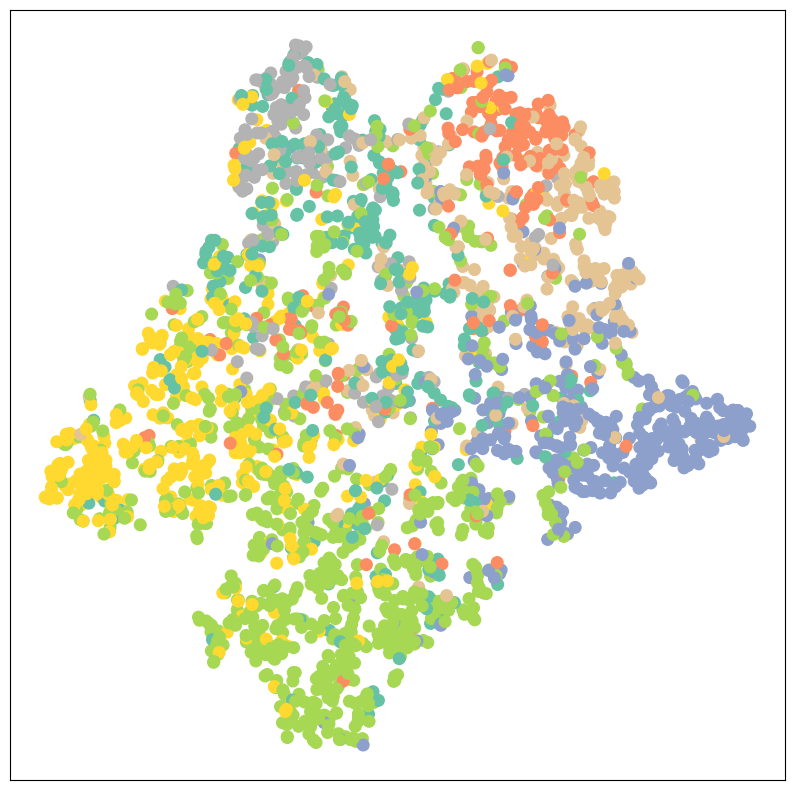

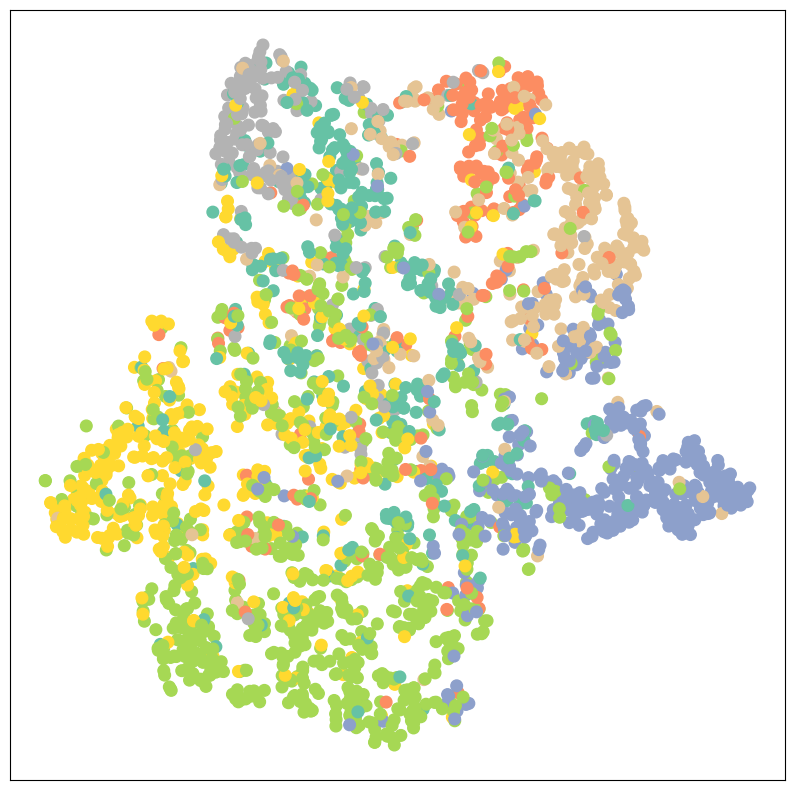

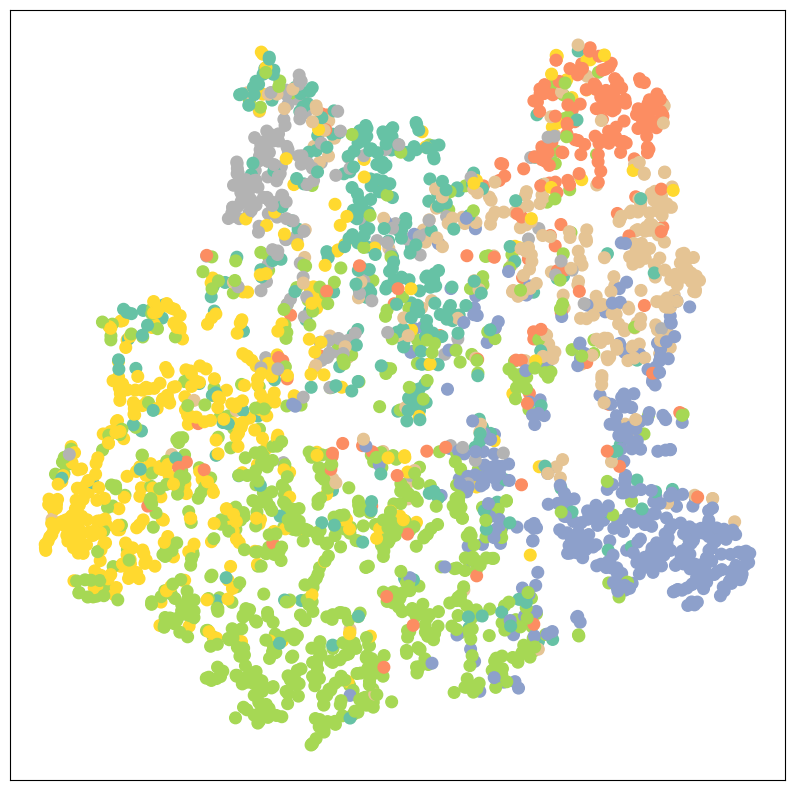

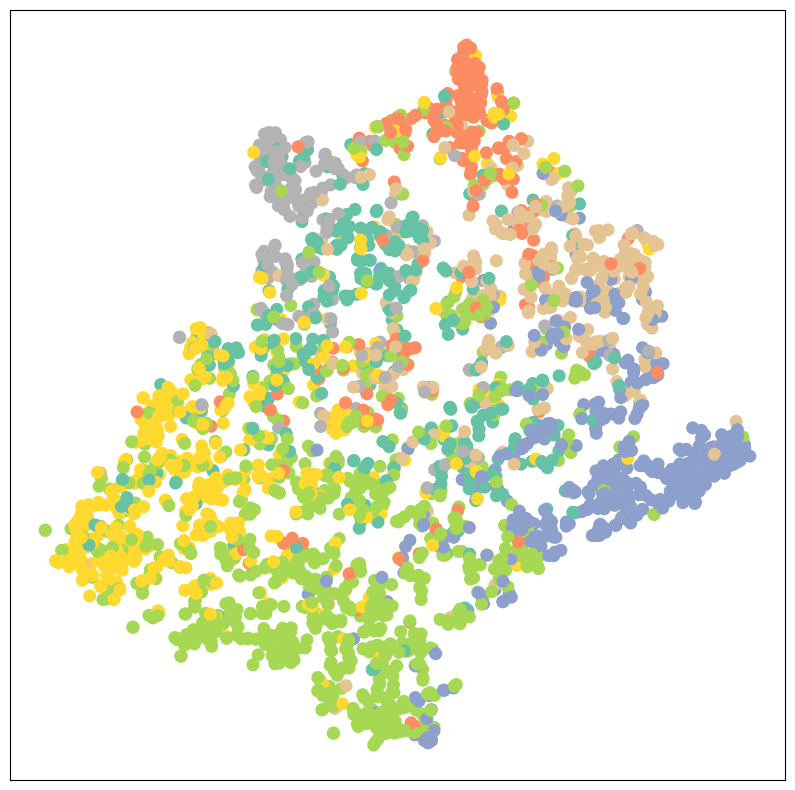

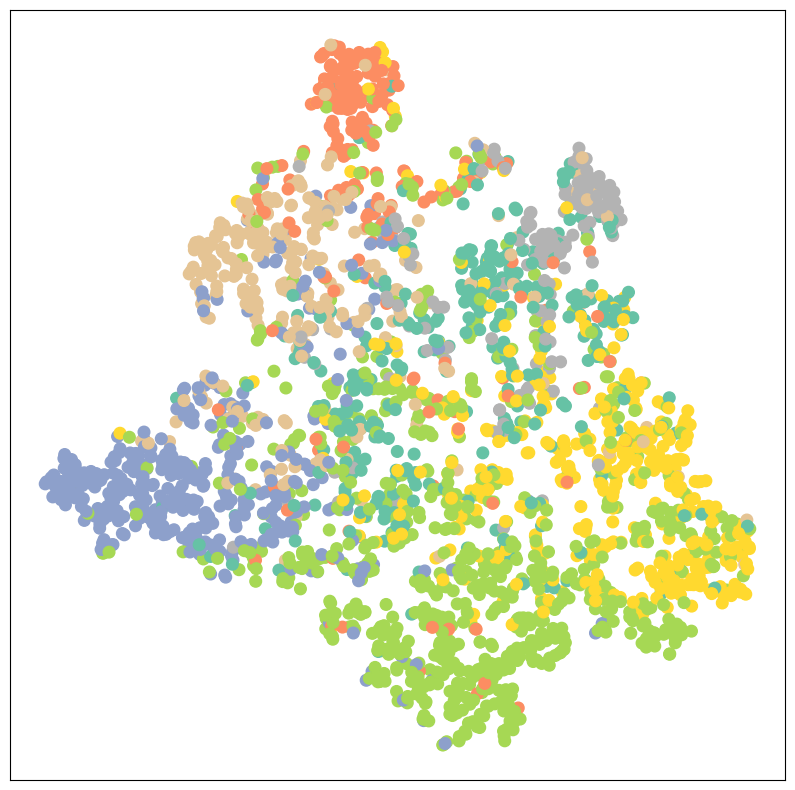

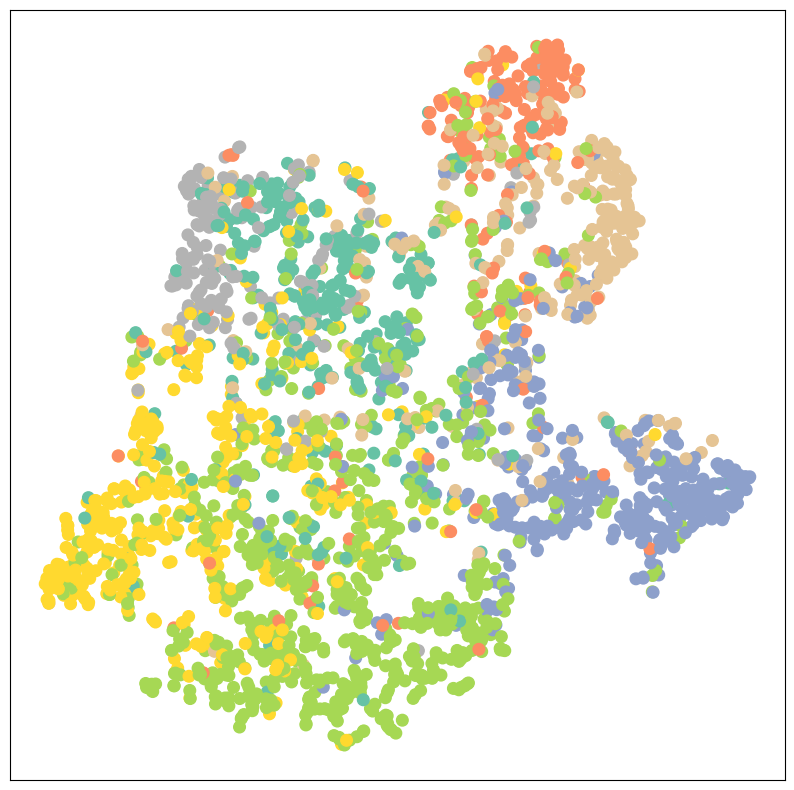

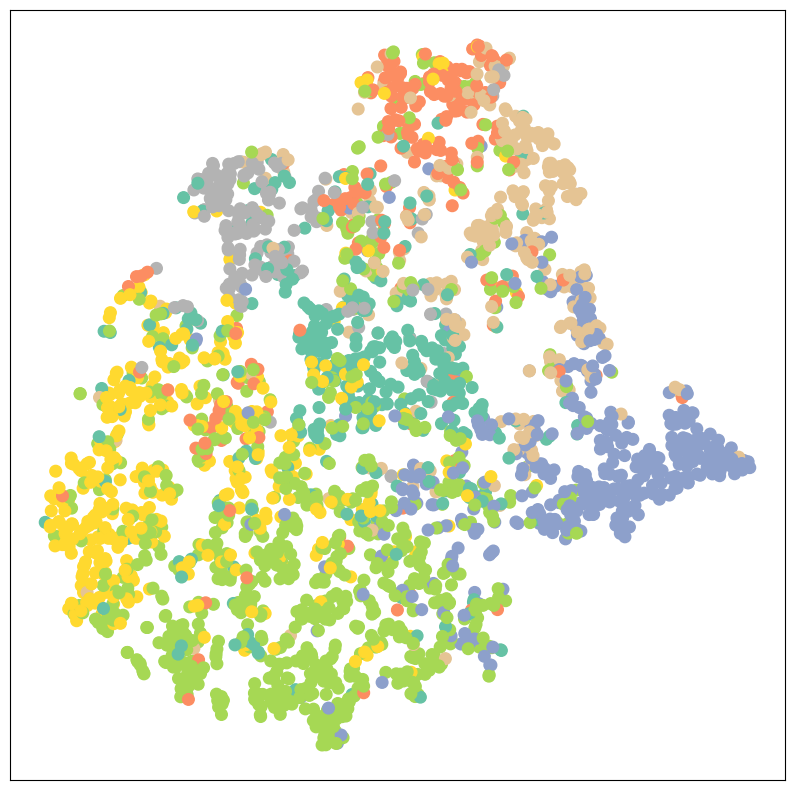

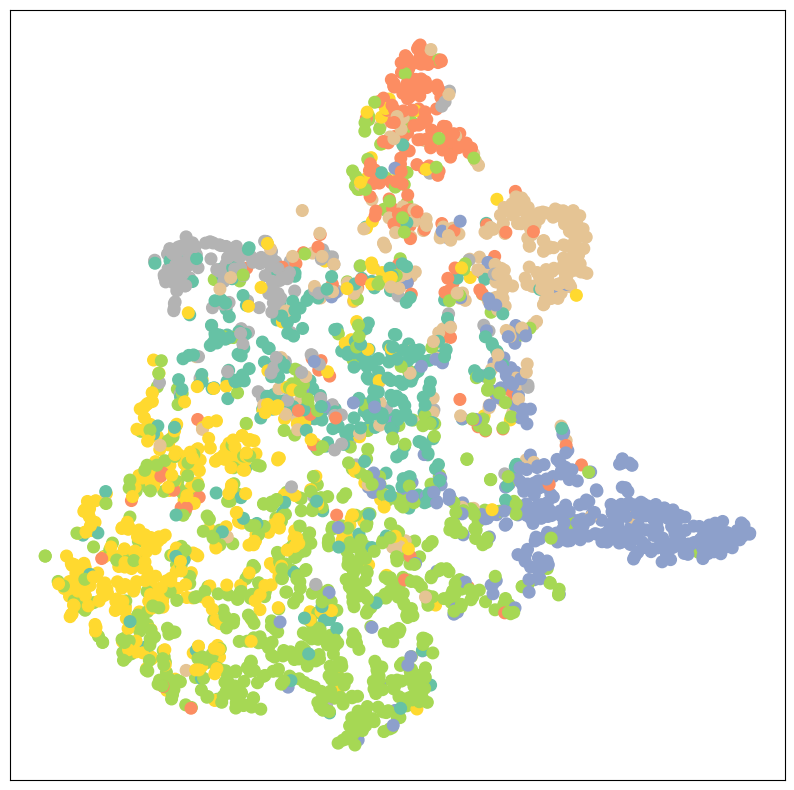

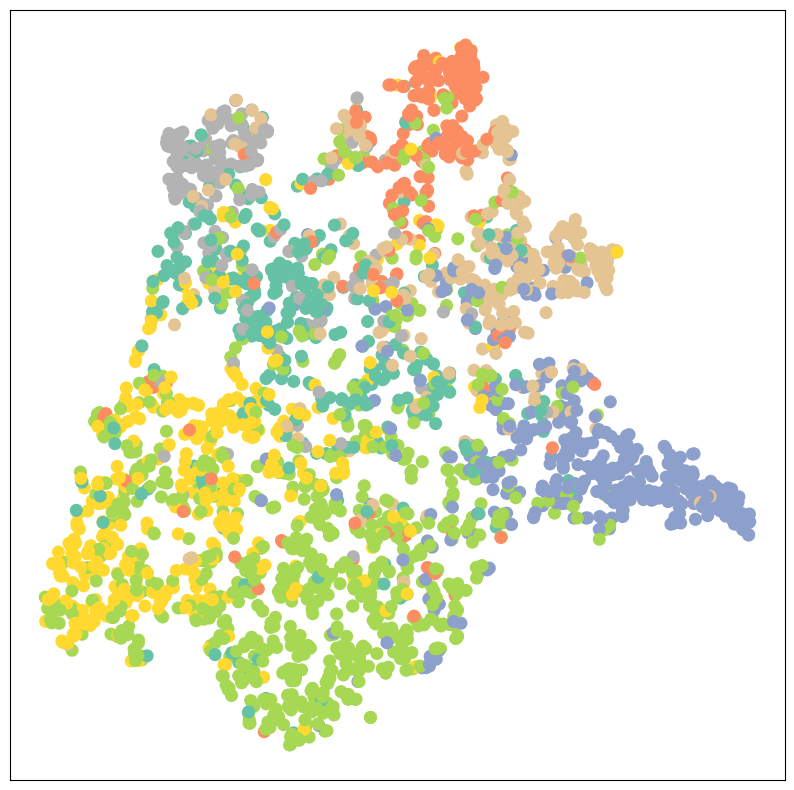

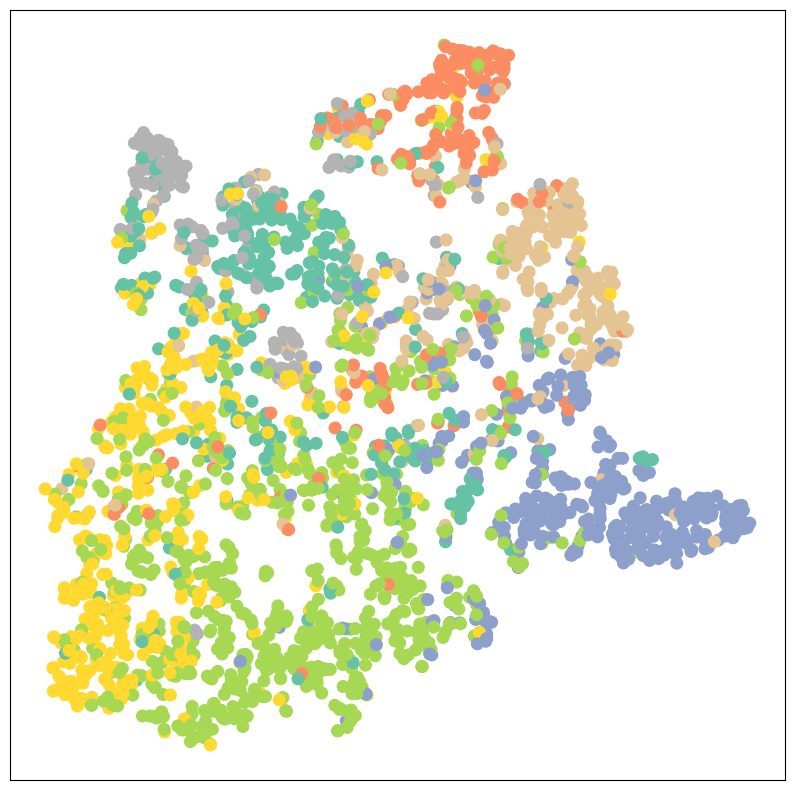

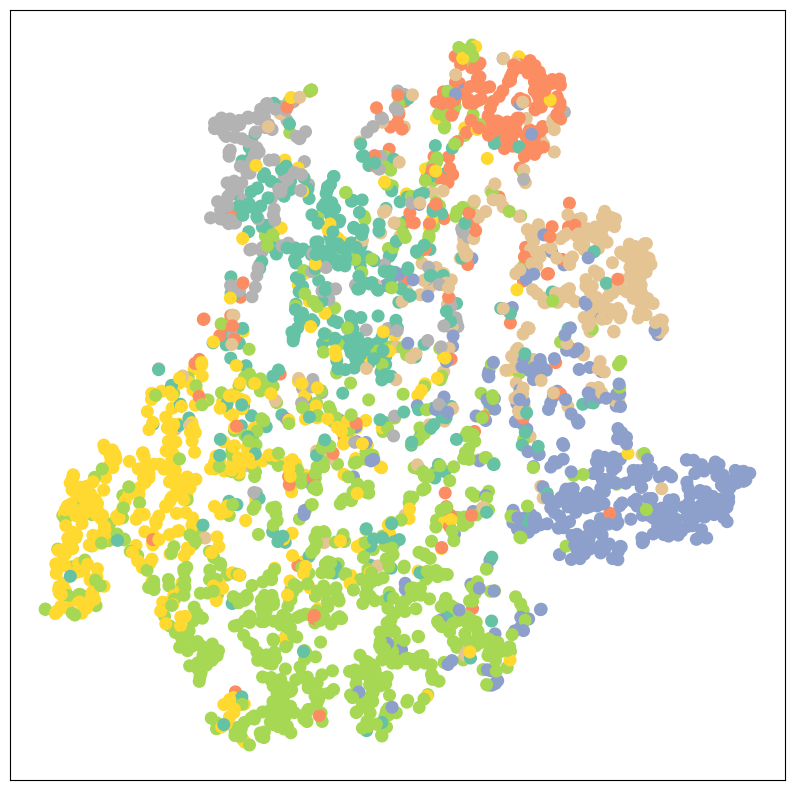

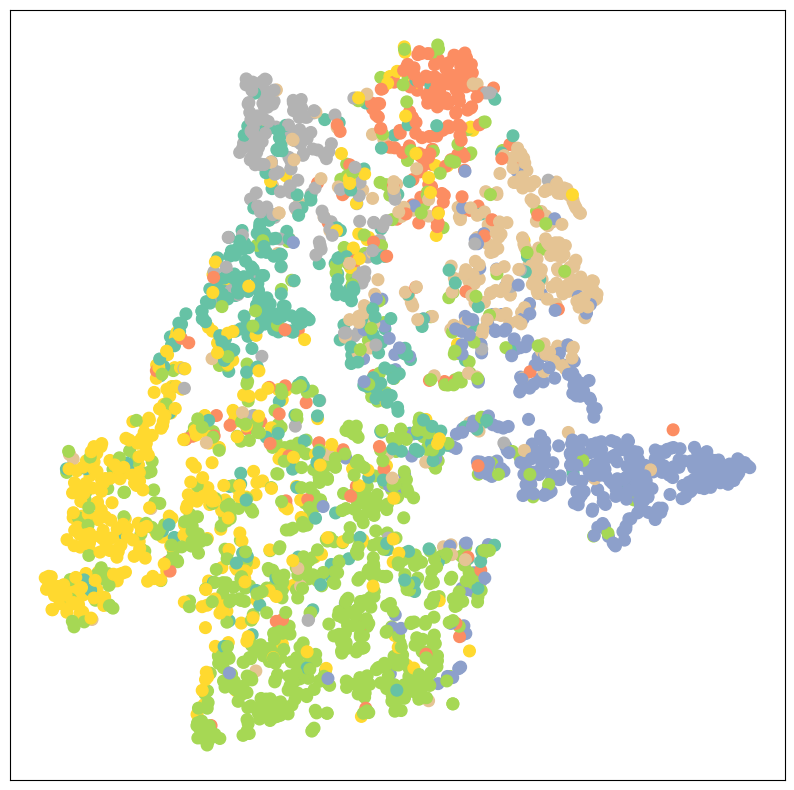

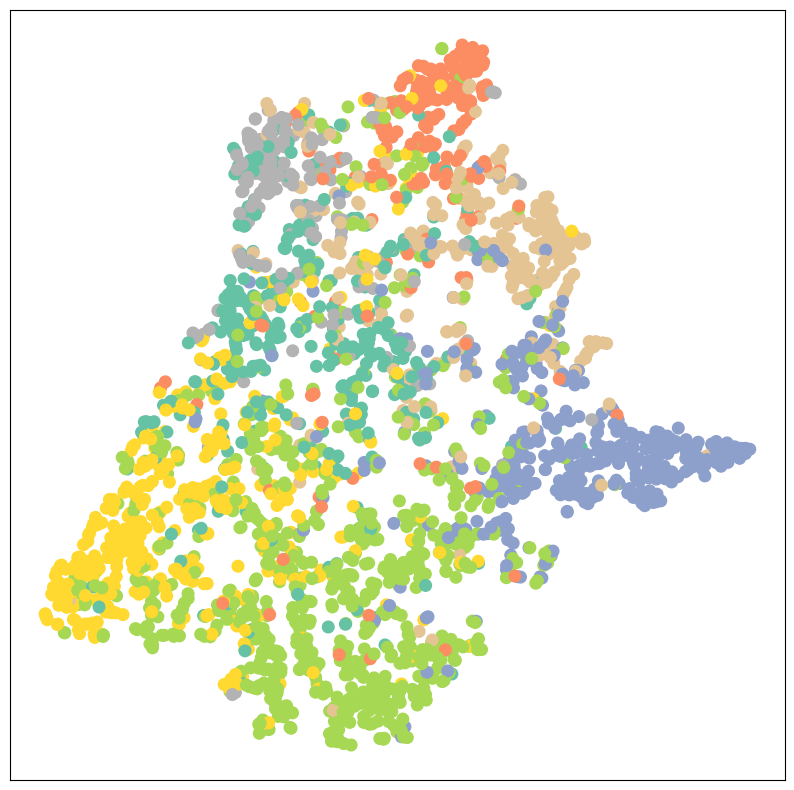

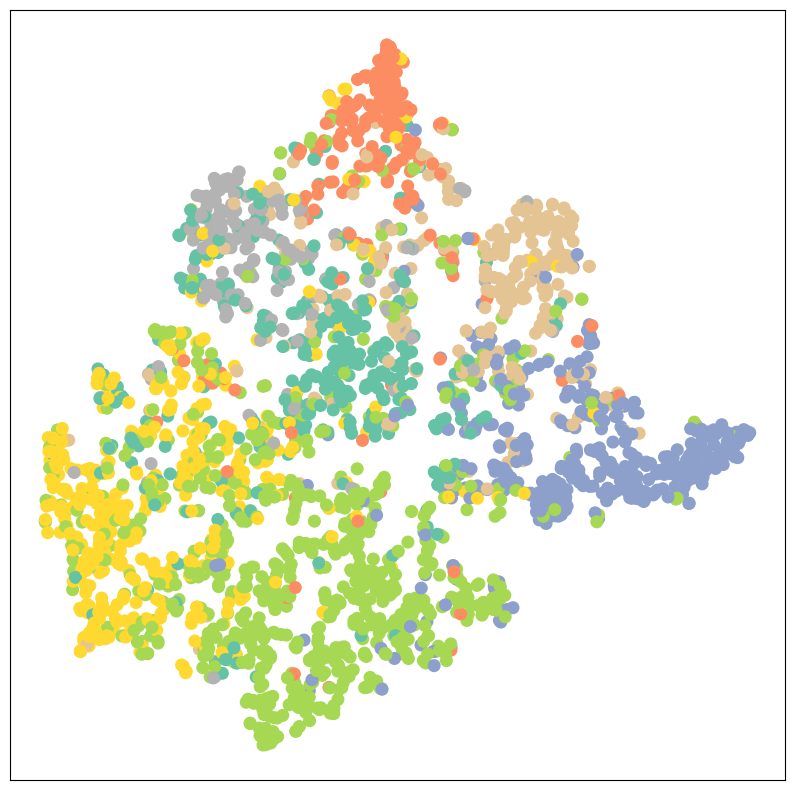

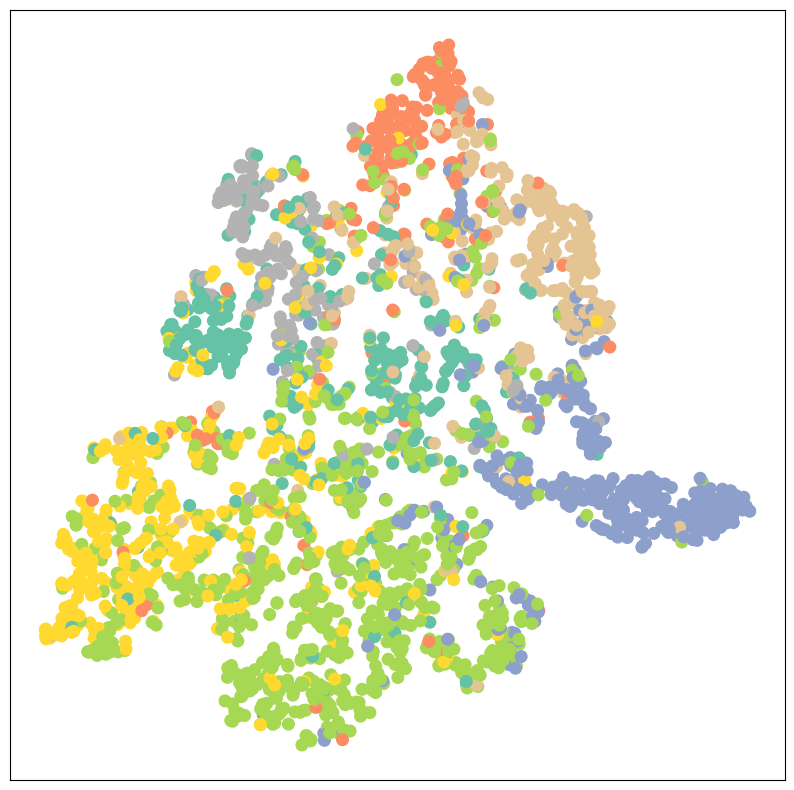

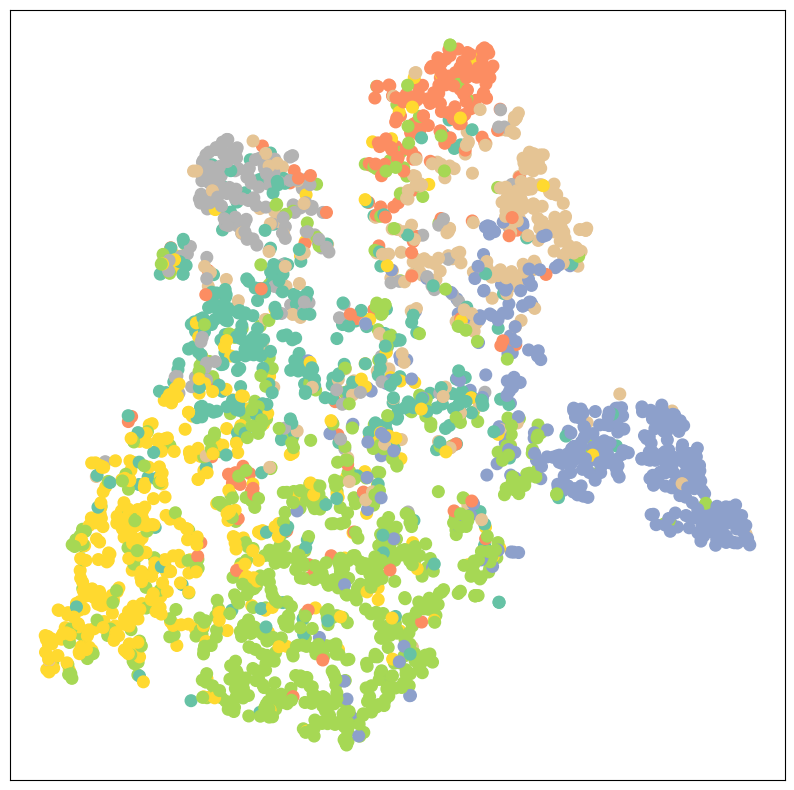

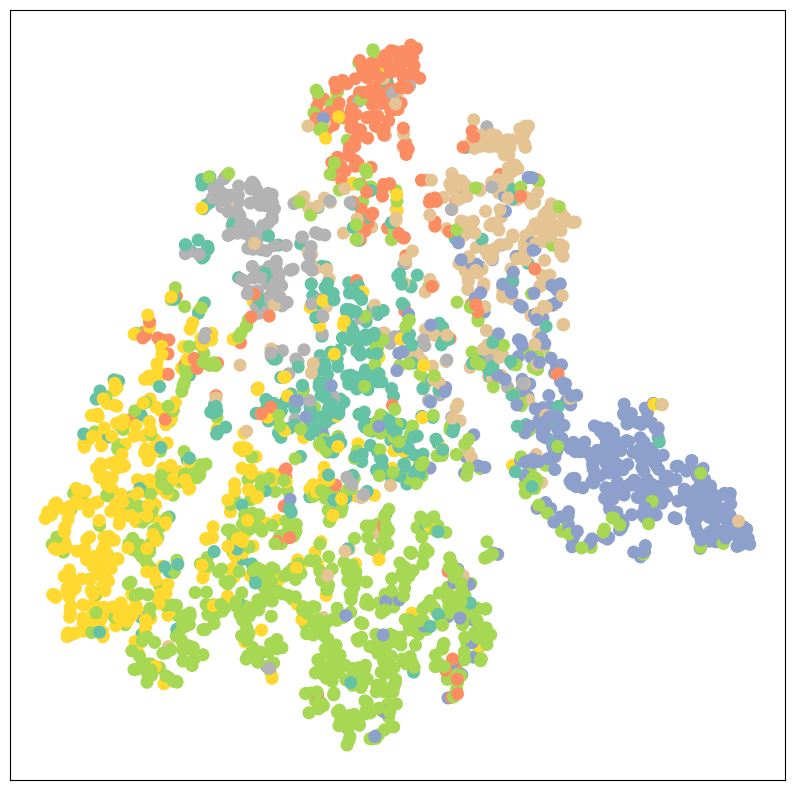

In [81]:
for epoch in range(201):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=None)
        time.sleep(0.3)
        ## Added by Me
        final_h = h

## 5. GATConv model

In [35]:
from torch_geometric.nn import GATConv


class GAT(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(dataset.num_features, hidden_channels)
        self.conv2 = GATConv(hidden_channels, dataset.num_classes)
        self.classifier = Linear(7, 2708)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        out = self.classifier(x)
        
        return out, x

model = GAT(hidden_channels=16)
print(model)

GAT(
  (conv1): GATConv(1433, 16, heads=1)
  (conv2): GATConv(16, 7, heads=1)
  (classifier): Linear(in_features=7, out_features=2708, bias=True)
)


In [61]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GAT(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train(data):
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss, h

def test():
      model.eval()
      out, h = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

start = timeit.timeit()
for epoch in range(1, 301):
    loss, h = train(data)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
end = timeit.timeit()
print(end - start)

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 7.9953
Epoch: 002, Loss: 7.9627
Epoch: 003, Loss: 7.9280
Epoch: 004, Loss: 7.8911
Epoch: 005, Loss: 7.8507
Epoch: 006, Loss: 7.7991
Epoch: 007, Loss: 7.7419
Epoch: 008, Loss: 7.6831
Epoch: 009, Loss: 7.6096
Epoch: 010, Loss: 7.5211
Epoch: 011, Loss: 7.4242
Epoch: 012, Loss: 7.3222
Epoch: 013, Loss: 7.1850
Epoch: 014, Loss: 7.0381
Epoch: 015, Loss: 6.8278
Epoch: 016, Loss: 6.6582
Epoch: 017, Loss: 6.4541
Epoch: 018, Loss: 6.2077
Epoch: 019, Loss: 5.9350
Epoch: 020, Loss: 5.4738
Epoch: 021, Loss: 5.2227
Epoch: 022, Loss: 4.7919
Epoch: 023, Loss: 4.3648
Epoch: 024, Loss: 3.9793
Epoch: 025, Loss: 3.5488
Epoch: 026, Loss: 3.3102
Epoch: 027, Loss: 2.9834
Epoch: 028, Loss: 2.8037
Epoch: 029, Loss: 2.6896
Epoch: 030, Loss: 2.5838
Epoch: 031, Loss: 2.4372
Epoch: 032, Loss: 2.3201
Epoch: 033, Loss: 2.2621
Epoch: 034, Loss: 2.1563
Epoch: 035, Loss: 2.1077
Epoch: 036, Loss: 2.0710
Epoch: 037, Loss: 2.0383
Epoch: 038, Loss: 2.0254
Epoch: 039, Loss: 2.0449
Epoch: 040, Loss: 2.0270


In [83]:
test_acc = test()
print(f'Test Accuracy GATConv: {test_acc:.4f}')

Test Accuracy GATConv: 0.7100


In [82]:
start = timeit.timeit()
for epoch in range(1, 401):
    loss, h = train(data)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
end = timeit.timeit()
print(end - start)

Epoch: 001, Loss: 0.1760
Epoch: 002, Loss: 0.1482
Epoch: 003, Loss: 0.1374
Epoch: 004, Loss: 0.1121
Epoch: 005, Loss: 0.1159
Epoch: 006, Loss: 0.0976
Epoch: 007, Loss: 0.1206
Epoch: 008, Loss: 0.0884
Epoch: 009, Loss: 0.0964
Epoch: 010, Loss: 0.1263
Epoch: 011, Loss: 0.1181
Epoch: 012, Loss: 0.1075
Epoch: 013, Loss: 0.1104
Epoch: 014, Loss: 0.0850
Epoch: 015, Loss: 0.1135
Epoch: 016, Loss: 0.0761
Epoch: 017, Loss: 0.1200
Epoch: 018, Loss: 0.0862
Epoch: 019, Loss: 0.1233
Epoch: 020, Loss: 0.1481
Epoch: 021, Loss: 0.1216
Epoch: 022, Loss: 0.1319
Epoch: 023, Loss: 0.0864
Epoch: 024, Loss: 0.1055
Epoch: 025, Loss: 0.1097
Epoch: 026, Loss: 0.0881
Epoch: 027, Loss: 0.0953
Epoch: 028, Loss: 0.0888
Epoch: 029, Loss: 0.1036
Epoch: 030, Loss: 0.1310
Epoch: 031, Loss: 0.1057
Epoch: 032, Loss: 0.1271
Epoch: 033, Loss: 0.1231
Epoch: 034, Loss: 0.1227
Epoch: 035, Loss: 0.1070
Epoch: 036, Loss: 0.0930
Epoch: 037, Loss: 0.0817
Epoch: 038, Loss: 0.1387
Epoch: 039, Loss: 0.1068
Epoch: 040, Loss: 0.0718


In [84]:
test_acc = test()
print(f'Test Accuracy GATConv: {test_acc:.4f}')

Test Accuracy GATConv: 0.7100


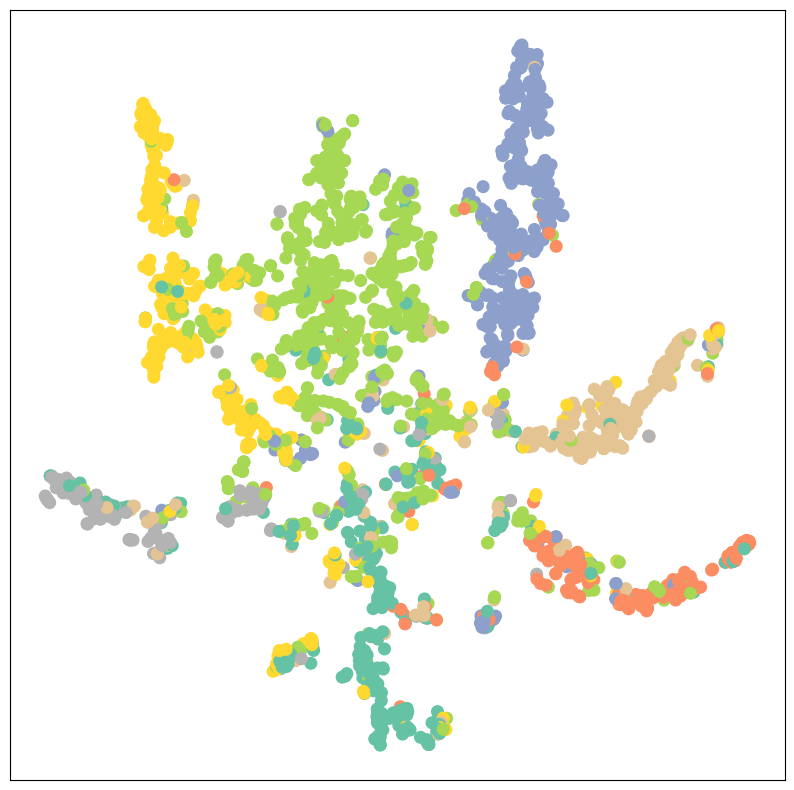

In [63]:
model.eval()

out, h = model(data.x, data.edge_index)
visualize(out, color=data.y)

## 6. ChevConv Model

In [38]:
from torch_geometric.nn import ChebConv


class CHEB(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = ChebConv(dataset.num_features, hidden_channels, 2)
        self.conv2 = ChebConv(hidden_channels, dataset.num_classes, 2)
        self.classifier = Linear(7, 2708)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        out = self.classifier(x)
        
        return out, x

model = CHEB(hidden_channels=16)
print(model)

CHEB(
  (conv1): ChebConv(1433, 16, K=2, normalization=sym)
  (conv2): ChebConv(16, 7, K=2, normalization=sym)
  (classifier): Linear(in_features=7, out_features=2708, bias=True)
)


In [39]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = CHEB(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train(data):
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss, h

def test():
      model.eval()
      out, h = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

start = timeit.timeit()
for epoch in range(1, 201):
    loss, h = train(data)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
end = timeit.timeit()
print(end - start)

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 7.9166
Epoch: 002, Loss: 7.8799
Epoch: 003, Loss: 7.8436
Epoch: 004, Loss: 7.8002
Epoch: 005, Loss: 7.7470
Epoch: 006, Loss: 7.6794
Epoch: 007, Loss: 7.6167
Epoch: 008, Loss: 7.5230
Epoch: 009, Loss: 7.4281
Epoch: 010, Loss: 7.3121
Epoch: 011, Loss: 7.1580
Epoch: 012, Loss: 7.0231
Epoch: 013, Loss: 6.8178
Epoch: 014, Loss: 6.5809
Epoch: 015, Loss: 6.3374
Epoch: 016, Loss: 5.9176
Epoch: 017, Loss: 5.5480
Epoch: 018, Loss: 5.0910
Epoch: 019, Loss: 4.6099
Epoch: 020, Loss: 4.2212
Epoch: 021, Loss: 3.7817
Epoch: 022, Loss: 3.4904
Epoch: 023, Loss: 3.3726
Epoch: 024, Loss: 3.1073
Epoch: 025, Loss: 2.9652
Epoch: 026, Loss: 2.7881
Epoch: 027, Loss: 2.6088
Epoch: 028, Loss: 2.4709
Epoch: 029, Loss: 2.2754
Epoch: 030, Loss: 2.1954
Epoch: 031, Loss: 2.0950
Epoch: 032, Loss: 2.0569
Epoch: 033, Loss: 1.9958
Epoch: 034, Loss: 2.0111
Epoch: 035, Loss: 1.9407
Epoch: 036, Loss: 1.9187
Epoch: 037, Loss: 1.8024
Epoch: 038, Loss: 1.6350
Epoch: 039, Loss: 1.6271
Epoch: 040, Loss: 1.5791


In [40]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.6860
